In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
x_train[0][-10:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [23]:
import numpy as np
from sklearn.manifold import TSNE

n=10000

In [24]:
%time x_tsne = TSNE(n_components=2).fit_transform(x_train[:n])

CPU times: user 4min 57s, sys: 18.4 s, total: 5min 16s
Wall time: 5min 12s


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

tsne_x = [x[0] for x in x_tsne]
tsne_y = [x[1] for x in x_tsne]


In [26]:
%%bash
pip install umap-learn

In [27]:
from umap import UMAP

umapper = UMAP(n_neighbors=5, min_dist=0.3, metric='correlation')

In [28]:
%time x_umap = umapper.fit_transform(x_train[:n])

CPU times: user 22.1 s, sys: 3.53 s, total: 25.7 s
Wall time: 22.5 s


In [29]:
umap_x = [x[0] for x in x_umap]
umap_y = [x[1] for x in x_umap]

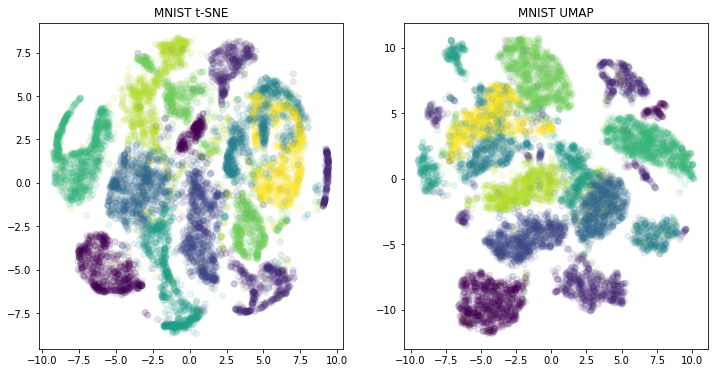

In [31]:
plt.figure(figsize=(12,6))

plt.figure(1)
plt.subplot(121)
plt.scatter(tsne_x, tsne_y, c=y_train[:n], alpha=0.1)
plt.title("MNIST t-SNE")

plt.subplot(122)
plt.scatter(umap_x, umap_y, c=y_train[:n], alpha=0.1)
plt.title("MNIST UMAP")
plt.show()
